# Machine Learning (real time visualization)

## Linear Regression

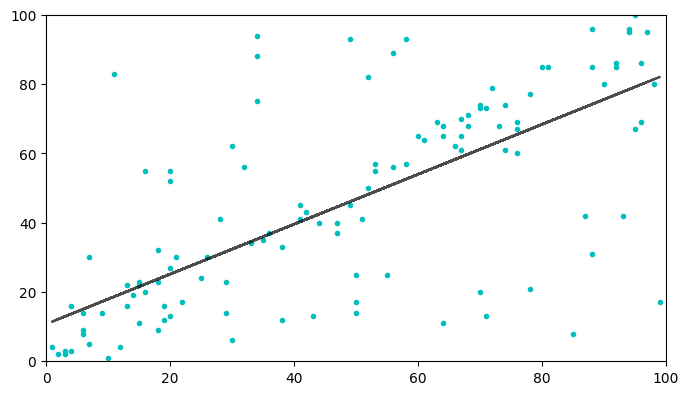

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
xdata, ydata = [50, 7], [14, 30]

fig.set_figheight(4.5)
fig.set_figwidth(8)

line1, = ax.plot([], [], 'c.')
line2, = ax.plot([], [], color="black", alpha=0.7, linestyle="-")

def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    new_x = np.random.randint(0, 100)
    new_y = np.random.randint(0, 100)
    xdata.append(new_x)
    ydata.append(new_y)
    line1.set_data(xdata, ydata)
    return line1, line2,

def update(n):
    new_x = np.random.randint(0, 100)
    if (n % 3 == 0):
        new_y = np.random.randint(0, 100)
    else:
        new_y = np.random.randint(new_x - 10, new_x + 10)

    xdata.append(new_x)
    ydata.append(new_y)

    coef = np.polyfit(xdata, ydata, 1)
    poly1d = np.poly1d(coef)(xdata)

    line1.set_data(xdata, ydata)
    line2.set_data(xdata, poly1d)
    return line1, line2,


from matplotlib import animation

ani = animation.FuncAnimation(fig, update, frames=120, interval=80, init_func=init, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())

## Logistic Regression

https://www.nbshare.io/notebook/415235001/Understanding-Logistic-Regression-Using-Python/

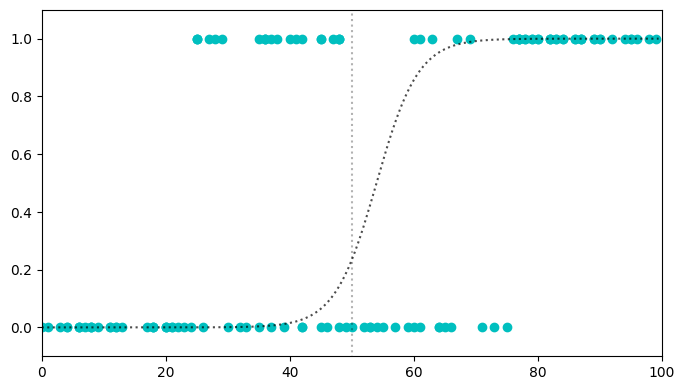

In [2]:
fig, ax = plt.subplots()
xdata, ydata = [], []

line1, = ax.plot([], [], 'co')
line2, = ax.plot([], [], color="black", alpha=0.7, linestyle=":")
line3, = ax.plot([50, 50], [-1, 2], color="black", alpha=0.3, linestyle=":")

fig.set_figheight(4.5)
fig.set_figwidth(8)

def logistic(x, x0, k, L):
    return L/(1+np.exp(-k*(x-x0)))

def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(-0.1, 1.1)
    return line1, line2, line3

def update(n):
    new_x = np.random.randint(1, 100)
    if new_x > 75:
        new_y = 1
    elif new_x < 25:
        new_y = 0
    else:
        new_y = np.random.randint(0,2)

    xdata.append(new_x)
    ydata.append(new_y)

    x0 = max(int(np.sum(np.multiply(xdata, ydata))/np.sum(xdata)*100) - 13, 0)
    k = n/400

    logic_x = np.arange(0, 100, 0.5)
    l = logistic(logic_x, x0, k, L=1)

    line1.set_data(xdata, ydata)
    line2.set_data(logic_x, l)
    return line1, line2, line3

ani = animation.FuncAnimation(fig, update, frames=120, interval=80, init_func=init, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())

## K-Nearest Neighbors

In [3]:
from numpy.random import random, randint
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
iris = load_iris()
x, y= iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

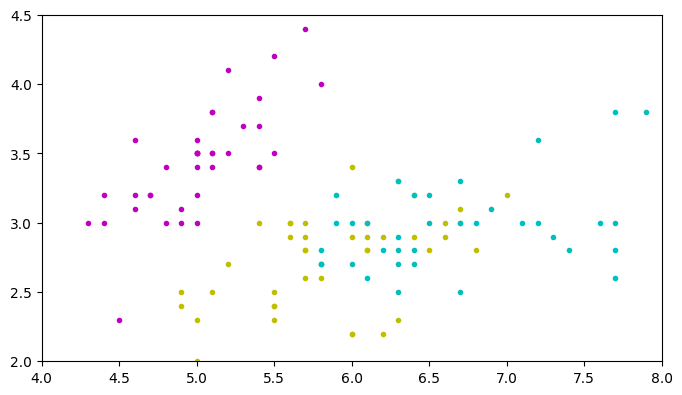

In [5]:
fig, ax = plt.subplots()

iris_data = {0: {'x': [], 'y': [], 'color': 'm.'},
             1: {'x': [], 'y': [], 'color': 'y.'},
             2: {'x': [], 'y': [], 'color': 'c.'}}

lines = [ax.plot([], [], data['color'])[0] for data in iris_data.values()]

fig.set_figheight(4.5)
fig.set_figwidth(8)

ax.set_xlim(4, 8)
ax.set_ylim(2, 4.5)

def update(n):
    data = x_train[n]
    score = knn.predict([data])[0]
    iris_data[score]['x'].append(data[0])
    iris_data[score]['y'].append(data[1])

    for line, data in zip(lines, iris_data.values()):
        line.set_data(data['x'], data['y'])

    return lines

ani = animation.FuncAnimation(fig, update, frames=len(x_train), interval=int(10000/len(x_train)), blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())
